# Context Presentation

  The problem consists in classifying all the blocks of the page layout of a document that has been detected by a segmentation process. This is an essential step in document analysis in order to separate text from graphic areas. Indeed, the five classes are: text (1), horizontal line (2), picture (3), vertical line (4) and graphic (5).
  
  
   The 5473 examples comes from 54 distinct documents. 
   Each observation concerns one block. 
   All attributes are numeric.

# Data Exploration

### Dataset preview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
col=["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classes"]
df=pd.read_csv("page-blocks.csv", sep=';',header=None, names=col, index_col=False)
df[:5]

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classes
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [3]:
df.tail()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classes
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1
5472,8,1,8,0.125,1.000,1.000,8.00,8,8,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
height      5473 non-null int64
lenght      5473 non-null int64
area        5473 non-null int64
eccen       5473 non-null float64
p_black     5473 non-null float64
p_and       5473 non-null float64
mean_tr     5473 non-null float64
blackpix    5473 non-null int64
blackand    5473 non-null int64
wb_trans    5473 non-null int64
classes     5473 non-null int64
dtypes: float64(4), int64(7)
memory usage: 470.4 KB


In [5]:
df.describe()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classes
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [6]:
df.nunique()

height       104
lenght       452
area        1395
eccen       1511
p_black      711
p_and        700
mean_tr      851
blackpix    1069
blackand    1718
wb_trans     581
classes        5
dtype: int64

# Vizualisation with Seaborn

### Nombre d'occurrences par classe

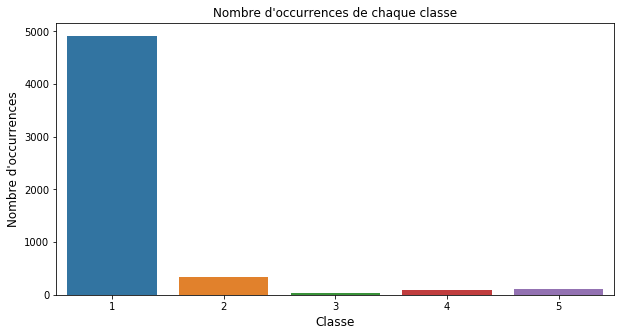

In [7]:
part_classe = df['classes'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(part_classe.index, part_classe.values)
plt.title('Nombre d\'occurrences de chaque classe')
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.xlabel('Classe', fontsize=12)
plt.show()

On peut observer que la classse 1 (texte) est largement représenté dans le dataset par rapport aux autres classes.

In [8]:
# Pourcentage d'occurences par classes
print(df['classes'].value_counts(','))

1    0.897680
2    0.060113
5    0.021012
4    0.016079
3    0.005116
Name: classes, dtype: float64


On se rend compte que plus de 89% des observations du dataset sont de la catégorie 1.

Pour que la prédiction d'un modèle soit significative, il faut alors que la précision du modèle soit supérieure à 89% (modèle intuitif où l'unique prédiction serait 1).

### Matrice de corrélation

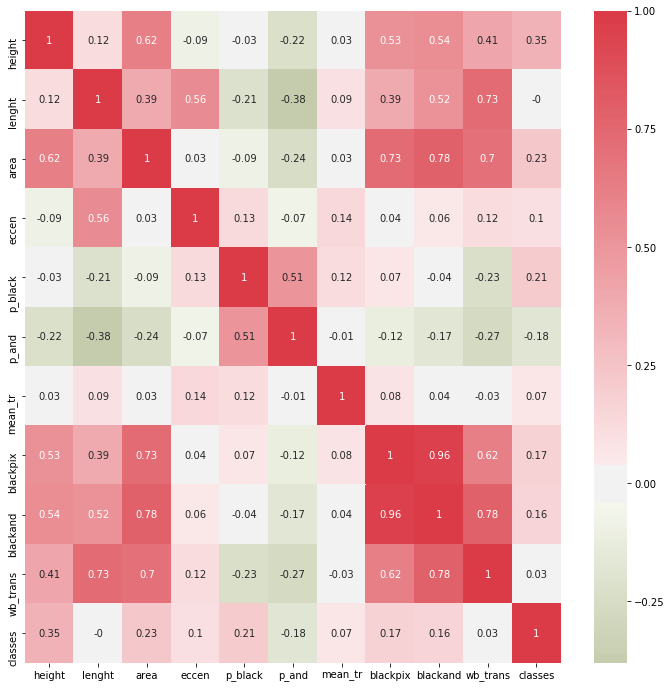

In [9]:
cor_matrix = df.corr().round(2)
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(100, 10, as_cmap=True));
plt.show()

La matrice de corrélation ne nous indique aucune corrélation forte de feature avec les classes. Nous allons donc devoir nous appuyer sur des modèles de classification.

### Boites à moustaches

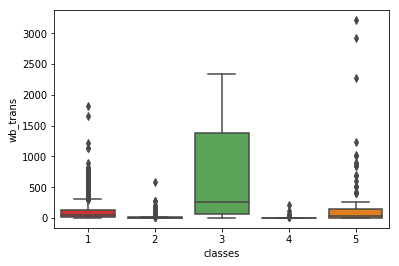

In [10]:
sns.boxplot(y="wb_trans", x="classes", data=df, palette="Set1")